In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
sleep1 = pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/대학자료/AI데이터연구단/뇌파 및 수면상태 연구/Wearable/삼성헬스/samsunghealth_goodcha46_202111011406/필요/com.samsung.shealth.sleep.202111011406.csv',encoding='utf-8', skiprows=1)
sleep1.head()

,original_efficiency,mental_recovery,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10,has_sleep_data,combined_id,data_version,physical_recovery,original_wake_up_time,movement_awakening,original_bed_time,quality,extra_data,sleep_cycle,efficiency,sleep_score,sleep_duration,com.samsung.health.sleep.start_time,com.samsung.health.sleep.custom,com.samsung.health.sleep.update_time,com.samsung.health.sleep.create_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.deviceuuid,com.samsung.health.sleep.comment,com.samsung.health.sleep.pkg_name,com.samsung.health.sleep.end_time,com.samsung.health.sleep.datauuid
NaN,34.0,41.0,41.0,10.0,21.0,35.0,370.0,146.0,3.0,21.0,0.0,0.0,2b8110d8-4a2a-4046-a4f5-a625bfc05483,1.0,59.0,NaN,22.0,NaN,NaN,8ccc9bf3-c4c5-42cd-92b7-9e46eaa2f37d.extra_dat...,3.0,90.0,61.0,370.0,2021-10-01 14:53:00.000,NaN,2021-10-01 22:01:03.604,2021-10-01 21:03:44.127,UTC+0900,DQQ9M5Fmpd,NaN,com.sec.android.app.shealth,2021-10-01 21:03:00.000,8ccc9bf3-c4c5-42cd-92b7-9e46eaa2f37d,NaN
NaN,60.0,14.0,14.0,2.0,5.0,7.0,81.0,81.0,1.0,3.0,0.0,0.0,32760014-c0a3-46da-9c65-9ff9e79c04c0,1.0,32.0,NaN,15.0,NaN,NaN,936eb40a-a8c7-49b8-90c1-9e2450863b03.extra_dat...,1.0,91.0,70.0,81.0,2021-09-30 14:15:00.000,NaN,2021-10-01 01:43:48.749,2021-09-30 15:42:31.472,UTC+0900,DQQ9M5Fmpd,NaN,com.sec.android.app.shealth,2021-09-30 15:36:00.000,936eb40a-a8c7-49b8-90c1-9e2450863b03,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2020-11-08 13:30:00.000,NaN,2020-11-08 23:02:29.626,2020-11-08 23:02:29.626,UTC+0900,1pqYBn0PvJ,NaN,com.sec.android.app.shealth,2020-11-08 21:20:00.000,acb48575-48be-4301-a427-6c2a270ca784,NaN
NaN,45.0,37.0,37.0,12.0,25.0,83.0,466.0,124.0,2.0,59.0,0.0,0.0,NaN,1.0,66.0,NaN,40.0,NaN,NaN,02f8056d-6d0b-4275-bd02-11c583e9c380.extra_dat...,4.0,82.0,58.0,466.0,2021-10-05 14:03:00.000,NaN,2021-10-05 21:50:16.112,2021-10-05 21:50:07.069,UTC+0900,DQQ9M5Fmpd,NaN,com.sec.android.app.shealth,2021-10-05 21:49:00.000,02f8056d-6d0b-4275-bd02-11c583e9c380,NaN
NaN,70.0,0.0,13.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,2b8110d8-4a2a-4046-a4f5-a625bfc05483,1.0,35.0,NaN,0.0,NaN,NaN,b8b8ecef-3cf7-4b64-8509-40dd036f8d44.extra_dat...,0.0,100.0,54.0,42.0,2021-10-01 21:18:00.000,NaN,2021-10-01 22:01:03.621,2021-10-01 22:00:59.900,UTC+0900,DQQ9M5Fmpd,NaN,com.sec.android.app.shealth,2021-10-01 22:00:00.000,b8b8ecef-3cf7-4b64-8509-40dd036f8d44,NaN


In [3]:
sleep1 = sleep1.shift(periods = 1, axis = 'columns')

In [4]:
sleep_fac = sleep1.iloc[:,2:12]
sleep_fac.reset_index(inplace = True)
sleep_fac.head()

,index,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
0,NaN,41.0,41.0,10.0,21.0,35.0,370.0,146.0,3.0,21.0,0.0
1,NaN,14.0,14.0,2.0,5.0,7.0,81.0,81.0,1.0,3.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,37.0,37.0,12.0,25.0,83.0,466.0,124.0,2.0,59.0,0.0
4,NaN,0.0,13.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0


In [5]:
sleep_fac.drop('index', axis = 1, inplace = True)
sleep_fac.head()

,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
0,41.0,41.0,10.0,21.0,35.0,370.0,146.0,3.0,21.0,0.0
1,14.0,14.0,2.0,5.0,7.0,81.0,81.0,1.0,3.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.0,37.0,12.0,25.0,83.0,466.0,124.0,2.0,59.0,0.0
4,0.0,13.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0


In [6]:
sleep_fac.isna().sum()

factor_01    9
factor_02    9
factor_03    9
factor_04    9
factor_05    9
factor_06    9
factor_07    9
factor_08    9
factor_09    9
factor_10    9
dtype: int64

In [7]:
sleep_fac.dropna(axis = 0, inplace = True)
sleep_fac.isna().sum()

factor_01    0
factor_02    0
factor_03    0
factor_04    0
factor_05    0
factor_06    0
factor_07    0
factor_08    0
factor_09    0
factor_10    0
dtype: int64

In [8]:
sleep_fac.corr()

,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
factor_01,1.000000,0.930015,0.097580,0.364599,0.410311,0.388038,0.283699,0.554952,0.420441,NaN
factor_02,0.930015,1.000000,0.006860,0.416772,0.445227,0.453737,0.143893,0.536906,0.455364,NaN
factor_03,0.097580,0.006860,1.000000,0.052847,0.414506,0.183665,0.814825,-0.030551,0.337318,NaN
factor_04,0.364599,0.416772,0.052847,1.000000,0.615903,0.555289,0.182391,0.792938,0.575789,NaN
factor_05,0.410311,0.445227,0.414506,0.615903,1.000000,0.783673,0.414232,0.491886,0.913997,NaN
factor_06,0.388038,0.453737,0.183665,0.555289,0.783673,1.000000,0.360847,0.532105,0.543870,NaN
factor_07,0.283699,0.143893,0.814825,0.182391,0.414232,0.360847,1.000000,0.225322,0.291694,NaN
factor_08,0.554952,0.536906,-0.030551,0.792938,0.491886,0.532105,0.225322,1.000000,0.428651,NaN
factor_09,0.420441,0.455364,0.337318,0.575789,0.913997,0.543870,0.291694,0.428651,1.000000,NaN
factor_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sleep_corr = sleep_fac.corr()
sleep_corr

,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
factor_01,1.000000,0.930015,0.097580,0.364599,0.410311,0.388038,0.283699,0.554952,0.420441,NaN
factor_02,0.930015,1.000000,0.006860,0.416772,0.445227,0.453737,0.143893,0.536906,0.455364,NaN
factor_03,0.097580,0.006860,1.000000,0.052847,0.414506,0.183665,0.814825,-0.030551,0.337318,NaN
factor_04,0.364599,0.416772,0.052847,1.000000,0.615903,0.555289,0.182391,0.792938,0.575789,NaN
factor_05,0.410311,0.445227,0.414506,0.615903,1.000000,0.783673,0.414232,0.491886,0.913997,NaN
factor_06,0.388038,0.453737,0.183665,0.555289,0.783673,1.000000,0.360847,0.532105,0.543870,NaN
factor_07,0.283699,0.143893,0.814825,0.182391,0.414232,0.360847,1.000000,0.225322,0.291694,NaN
factor_08,0.554952,0.536906,-0.030551,0.792938,0.491886,0.532105,0.225322,1.000000,0.428651,NaN
factor_09,0.420441,0.455364,0.337318,0.575789,0.913997,0.543870,0.291694,0.428651,1.000000,NaN
factor_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


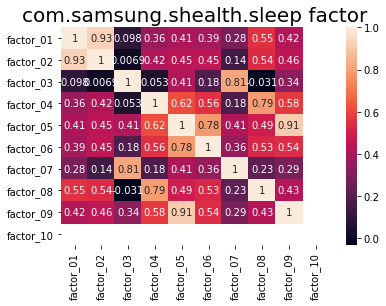

In [21]:
# heatmap by seaborn

sleep_corr_heat = sns.heatmap(sleep_corr, annot = True)
plt.title('com.samsung.shealth.sleep factor', fontsize=20)
plt.show() 

In [11]:
sleep2 = pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/대학자료/AI데이터연구단/뇌파 및 수면상태 연구/Wearable/삼성헬스/samsunghealth_goodcha46_202111011406/필요/com.samsung.shealth.sleep_combined.202111011406.csv',encoding='utf-8', skiprows=1)
sleep2.head()

,original_efficiency,start_time,mental_recovery,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10,has_sleep_data,update_time,create_time,data_version,physical_recovery,original_wake_up_time,movement_awakening,original_bed_time,quality,time_offset,extra_data,deviceuuid,sleep_cycle,efficiency,sleep_score,pkg_name,sleep_duration,end_time,datauuid
NaN,2021-10-23 14:33:00.000,61.0,33,36,26,14,87,414,146,2,69,0,0,2021-10-23 21:49:58.345,2021-10-23 21:49:58.345,1,59.0,NaN,55.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,5,78.0,63,com.sec.android.app.shealth,414,2021-10-23 21:38:00.000,58869d4b-4162-4a22-9386-5dd9c2ba2ea1,NaN
NaN,2021-10-07 14:01:00.000,52.0,0,32,13,13,78,446,194,2,61,0,0,2021-10-07 21:37:55.701,2021-10-07 21:37:55.701,1,52.0,NaN,38.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,3,82.0,48,com.sec.android.app.shealth,446,2021-10-07 21:36:00.000,0262f951-aa99-43cd-bc68-d05458e8593f,NaN
NaN,2021-09-30 14:15:00.000,52.0,14,47,2,13,69,409,81,2,54,0,0,2021-10-01 01:43:48.639,2021-10-01 01:43:48.639,1,59.0,NaN,33.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,3,83.0,66,com.sec.android.app.shealth,409,2021-09-30 21:11:00.000,32760014-c0a3-46da-9c65-9ff9e79c04c0,NaN
NaN,2021-10-01 14:53:00.000,34.0,41,54,10,21,35,412,146,3,21,0,0,2021-10-01 22:01:03.587,2021-10-01 22:01:03.587,1,66.0,NaN,20.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,3,91.0,61,com.sec.android.app.shealth,412,2021-10-01 22:00:00.000,2b8110d8-4a2a-4046-a4f5-a625bfc05483,NaN
NaN,2021-10-17 13:14:00.000,68.0,12,18,5,7,39,457,85,1,19,0,0,2021-10-17 21:00:55.640,2021-10-17 21:00:55.640,1,55.0,NaN,19.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,3,91.0,66,com.sec.android.app.shealth,457,2021-10-17 21:00:00.000,40c5c8ed-a27c-4955-baf6-7f293ca8d926,NaN


In [12]:
sleep2 = sleep2.shift(periods = 1, axis = 'columns')
sleep2.head()

,original_efficiency,start_time,mental_recovery,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10,has_sleep_data,update_time,create_time,data_version,physical_recovery,original_wake_up_time,movement_awakening,original_bed_time,quality,time_offset,extra_data,deviceuuid,sleep_cycle,efficiency,sleep_score,pkg_name,sleep_duration,end_time,datauuid
NaN,NaN,2021-10-23 14:33:00.000,61.0,33,36,26,14,87,414,146,2,69,0,0,2021-10-23 21:49:58.345,2021-10-23 21:49:58.345,1,59.0,NaN,55.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,5,78.0,63,com.sec.android.app.shealth,414,2021-10-23 21:38:00.000,58869d4b-4162-4a22-9386-5dd9c2ba2ea1
NaN,NaN,2021-10-07 14:01:00.000,52.0,0,32,13,13,78,446,194,2,61,0,0,2021-10-07 21:37:55.701,2021-10-07 21:37:55.701,1,52.0,NaN,38.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,3,82.0,48,com.sec.android.app.shealth,446,2021-10-07 21:36:00.000,0262f951-aa99-43cd-bc68-d05458e8593f
NaN,NaN,2021-09-30 14:15:00.000,52.0,14,47,2,13,69,409,81,2,54,0,0,2021-10-01 01:43:48.639,2021-10-01 01:43:48.639,1,59.0,NaN,33.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,3,83.0,66,com.sec.android.app.shealth,409,2021-09-30 21:11:00.000,32760014-c0a3-46da-9c65-9ff9e79c04c0
NaN,NaN,2021-10-01 14:53:00.000,34.0,41,54,10,21,35,412,146,3,21,0,0,2021-10-01 22:01:03.587,2021-10-01 22:01:03.587,1,66.0,NaN,20.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,3,91.0,61,com.sec.android.app.shealth,412,2021-10-01 22:00:00.000,2b8110d8-4a2a-4046-a4f5-a625bfc05483
NaN,NaN,2021-10-17 13:14:00.000,68.0,12,18,5,7,39,457,85,1,19,0,0,2021-10-17 21:00:55.640,2021-10-17 21:00:55.640,1,55.0,NaN,19.0,NaN,0,UTC+0900,NaN,DQQ9M5Fmpd,3,91.0,66,com.sec.android.app.shealth,457,2021-10-17 21:00:00.000,40c5c8ed-a27c-4955-baf6-7f293ca8d926


In [13]:
sleep_fac2 = sleep2.iloc[:,3:13]
sleep_fac2.reset_index(inplace = True)
sleep_fac2.head()

,index,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
0,NaN,33,36,26,14,87,414,146,2,69,0
1,NaN,0,32,13,13,78,446,194,2,61,0
2,NaN,14,47,2,13,69,409,81,2,54,0
3,NaN,41,54,10,21,35,412,146,3,21,0
4,NaN,12,18,5,7,39,457,85,1,19,0


In [14]:
sleep_fac2.drop('index', axis = 1, inplace = True)
sleep_fac2.head()

,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
0,33,36,26,14,87,414,146,2,69,0
1,0,32,13,13,78,446,194,2,61,0
2,14,47,2,13,69,409,81,2,54,0
3,41,54,10,21,35,412,146,3,21,0
4,12,18,5,7,39,457,85,1,19,0


In [15]:
sleep_fac2.dropna(axis = 0, inplace = True)
sleep_fac2.isna().sum()

factor_01    0
factor_02    0
factor_03    0
factor_04    0
factor_05    0
factor_06    0
factor_07    0
factor_08    0
factor_09    0
factor_10    0
dtype: int64

In [16]:
result =pd.concat([sleep_fac,sleep_fac2],axis=1)
result

,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
0,41.0,41.0,10.0,21.0,35.0,370.0,146.0,3.0,21.0,0.0,33.0,36.0,26.0,14.0,87.0,414.0,146.0,2.0,69.0,0.0
1,14.0,14.0,2.0,5.0,7.0,81.0,81.0,1.0,3.0,0.0,0.0,32.0,13.0,13.0,78.0,446.0,194.0,2.0,61.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,47.0,2.0,13.0,69.0,409.0,81.0,2.0,54.0,0.0
3,37.0,37.0,12.0,25.0,83.0,466.0,124.0,2.0,59.0,0.0,41.0,54.0,10.0,21.0,35.0,412.0,146.0,3.0,21.0,0.0
4,0.0,13.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,12.0,18.0,5.0,7.0,39.0,457.0,85.0,1.0,19.0,0.0
5,32.0,32.0,20.0,11.0,66.0,407.0,239.0,2.0,38.0,0.0,18.0,38.0,14.0,4.0,75.0,473.0,75.0,1.0,47.0,0.0
6,31.0,31.0,9.0,18.0,48.0,418.0,124.0,3.0,23.0,0.0,10.0,10.0,5.0,2.0,44.0,370.0,108.0,0.0,21.0,0.0
7,23.0,51.0,10.0,14.0,56.0,482.0,108.0,2.0,32.0,0.0,43.0,49.0,11.0,20.0,60.0,425.0,115.0,2.0,42.0,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,21.0,4.0,7.0,41.0,378.0,108.0,1.0,19.0,0.0
11,33.0,33.0,23.0,8.0,62.0,328.0,191.0,1.0,51.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
sleep_corr2 = sleep_fac2.corr()
sleep_corr2

,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
factor_01,1.000000,0.678980,0.404591,0.712244,-0.041782,-0.016237,0.028974,0.573800,0.031137,NaN
factor_02,0.678980,1.000000,0.260596,0.825058,0.281608,0.260370,0.142878,0.870015,0.394082,NaN
factor_03,0.404591,0.260596,1.000000,0.274030,0.676088,0.300335,0.473634,0.327895,0.663088,NaN
factor_04,0.712244,0.825058,0.274030,1.000000,0.083087,0.040938,0.474068,0.927895,0.260710,NaN
factor_05,-0.041782,0.281608,0.676088,0.083087,1.000000,0.381079,0.247681,0.194340,0.975409,NaN
factor_06,-0.016237,0.260370,0.300335,0.040938,0.381079,1.000000,-0.057155,0.189667,0.334222,NaN
factor_07,0.028974,0.142878,0.473634,0.474068,0.247681,-0.057155,1.000000,0.486768,0.351433,NaN
factor_08,0.573800,0.870015,0.327895,0.927895,0.194340,0.189667,0.486768,1.000000,0.364677,NaN
factor_09,0.031137,0.394082,0.663088,0.260710,0.975409,0.334222,0.351433,0.364677,1.000000,NaN
factor_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


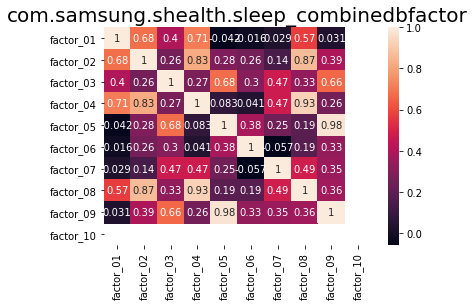

In [22]:
# heatmap by seaborn

sleep_corr_heat2 = sns.heatmap(sleep_corr2, annot = True)
plt.title('com.samsung.shealth.sleep_combinedbfactor', fontsize=20)
plt.show() 

In [19]:
sleep_fac.head()

,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
0,41.0,41.0,10.0,21.0,35.0,370.0,146.0,3.0,21.0,0.0
1,14.0,14.0,2.0,5.0,7.0,81.0,81.0,1.0,3.0,0.0
3,37.0,37.0,12.0,25.0,83.0,466.0,124.0,2.0,59.0,0.0
4,0.0,13.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0
5,32.0,32.0,20.0,11.0,66.0,407.0,239.0,2.0,38.0,0.0


In [20]:
sleep_fac2.head()

,factor_01,factor_02,factor_03,factor_04,factor_05,factor_06,factor_07,factor_08,factor_09,factor_10
0,33,36,26,14,87,414,146,2,69,0
1,0,32,13,13,78,446,194,2,61,0
2,14,47,2,13,69,409,81,2,54,0
3,41,54,10,21,35,412,146,3,21,0
4,12,18,5,7,39,457,85,1,19,0
